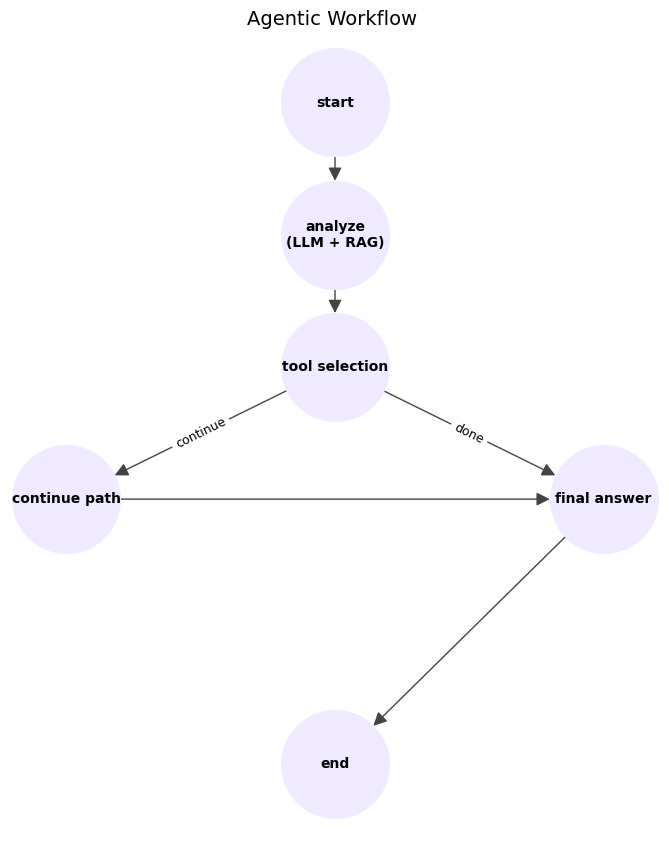

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# === Graph ===
G = nx.DiGraph()

# === NODES ===
G.add_node("start")
G.add_node("analyze\n(LLM + RAG)")
G.add_node("tool selection")
G.add_node("continue path")
G.add_node("final answer")
G.add_node("end")

# === EDGES ===
G.add_edge("start", "analyze\n(LLM + RAG)")
G.add_edge("analyze\n(LLM + RAG)", "tool selection")

# Branches — but no feedback loops
G.add_edge("tool selection", "continue path", label="continue")
G.add_edge("tool selection", "final answer", label="done")

# Both branches converge toward END
G.add_edge("continue path", "final answer")
G.add_edge("final answer", "end")

# === Layout (vertical with slight separation for branches) ===
pos = {
    "start": (0, 5),
    "analyze\n(LLM + RAG)": (0, 4),
    "tool selection": (0, 3),
    "continue path": (-2, 2),
    "final answer": (2, 2),
    "end": (0, 0),
}

# === Draw ===
plt.figure(figsize=(6.5, 8))

nx.draw(
    G, pos,
    with_labels=True,
    node_size=6000,
    node_color="#EFEAFF",
    font_size=10,
    font_weight="bold",
    edge_color="#444",
    arrows=True,
    arrowstyle="-|>",
    arrowsize=20
)

edge_labels = {
    ("tool selection", "continue path"): "continue",
    ("tool selection", "final answer"): "done"
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Agentic Workflow ", fontsize=14)
plt.axis("off")
plt.show()
